# ClusterAl 2021


# Ciencia de Datos - Ingenieria Industrial UTN BA
# Curso I5521


## "Establecimientos Educativos"

#### Docente: Martin Palazzo

#### Mentor: Julian Boglio

####  Grupo N°0
#### CAPDEVILA, Ailín
#### PEREZ PACE, Iñaki

El Ministerio de Educación e Innovación por medio de la Unidad de Evaluación Integral de la Calidad y Equidad Educativa y especificamente la Coordinación General de Información y Estadística Educativa, propocionó este Dataset en forma abierta donde se encuentran el listado con ubicación geográfica de los establecimientos educativos de la Ciudad.

La Ciudad de Buenos Aires consta de 15 comunas, 21 distritos escolares, con establecimientos educativos divididos en sector privado o estatal.

# Imports

## Import Library

In [1]:
#Importar paquetes de herramientas:
#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

## Import Dataframe

In [2]:
# Importo el dataframe
esteduc_df = pd.read_csv('establecimientos_educativos_WGS84.csv')

## Shape Dataframe

In [3]:
print(f'Tenemos un dataframe de {esteduc_df.shape[0]} filas x {esteduc_df.shape[1]} columnas')

Tenemos un dataframe de 2880 filas x 27 columnas


In [4]:
# columnas del dataframe
print(esteduc_df.columns.values)
print('_'*50)
print(esteduc_df.info())
# Age, Cabin y Embarked contienen nulos

['cui' 'cueanexo' 'cue' 'anexo' 'sector' 'dom_edific' 'dom_establ'
 'nombre_est' 'nombre_abr' 'telefono' 'email' 'codpost' 'web_megcba'
 'nivmod' 'nivelmodal' 'tipest_abr' 'tipest' 'depfun' 'depfun_otr' 'de'
 'comuna' 'barrio' 'area_progr' 'estado' 'point_x' 'point_y' 'Nivel']
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 27 columns):
cui           2880 non-null int64
cueanexo      2880 non-null int64
cue           2880 non-null int64
anexo         2880 non-null int64
sector        2880 non-null float64
dom_edific    2880 non-null object
dom_establ    2880 non-null object
nombre_est    2880 non-null object
nombre_abr    2879 non-null object
telefono      2879 non-null object
email         2867 non-null object
codpost       2880 non-null object
web_megcba    2861 non-null object
nivmod        2880 non-null object
nivelmodal    2880 non-null object
tipest_abr    2847 non-null object
tipest 

In [5]:
esteduc_df.describe()

,cui,cueanexo,cue,anexo,sector,depfun_otr,de,comuna,estado,point_x,point_y
count,2880.000000,2.880000e+03,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,201082.375694,2.018312e+07,201830.926042,3.262153,1.358681,1.002778,9.662153,7.683681,1.039931,101671.120115,101462.653877
std,759.927377,4.741707e+05,4741.668839,12.147654,0.479696,0.160299,6.178211,4.364546,0.195830,6636.311358,6370.882587
min,200001.000000,2.000010e+07,200001.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,101.848606,100.889816
25%,200452.000000,2.008275e+07,200827.500000,0.000000,1.000000,1.000000,4.000000,4.000000,1.000000,98792.066075,99343.956358
50%,200879.000000,2.015920e+07,201592.000000,0.000000,1.000000,1.000000,9.000000,8.000000,1.000000,101884.692212,101697.198223
75%,201662.250000,2.023692e+07,202369.250000,0.000000,2.000000,1.000000,15.000000,12.000000,1.000000,105256.085374,104078.258748
max,202700.000000,2.900300e+07,290030.000000,99.000000,2.000000,4.000000,21.000000,15.000000,2.000000,110269.076386,110375.365671


# Limpieza del DataFrame

##  Outliers

### Visulizacion de Outliers 

In [6]:
esteduc_o = esteduc_df.loc[esteduc_df.point_x  < 9000]
np.shape(esteduc_o)

(8, 27)

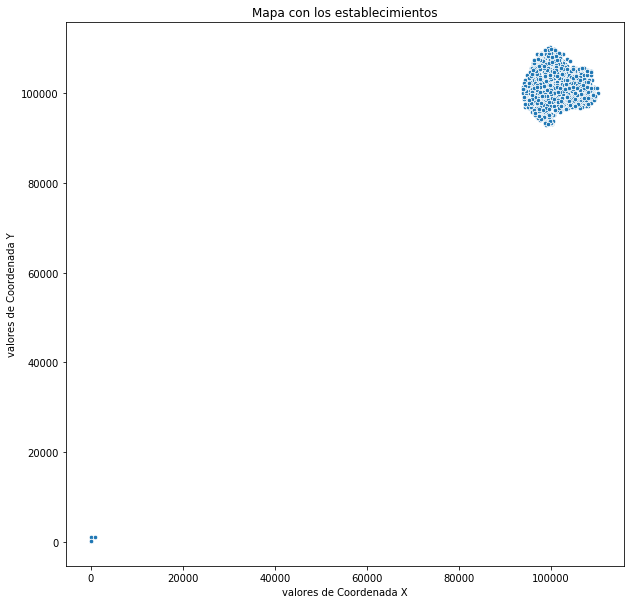

In [7]:
# Impresion la distribcion de los establecimientos
plt.figure(figsize=(10,10))
sns.scatterplot(x= esteduc_df.point_x.values , y= esteduc_df.point_y.values,s=20)
plt.title("Mapa con los establecimientos")
plt.xlabel("valores de Coordenada X")
plt.ylabel("valores de Coordenada Y")
plt.show()

### Eliminacion de Outliers 

In [9]:
# en este bloque de codigo crear el dataframe "".
esteduc_df = esteduc_df.loc[esteduc_df.point_x > 9000]
np.shape(esteduc_df)

(2872, 27)

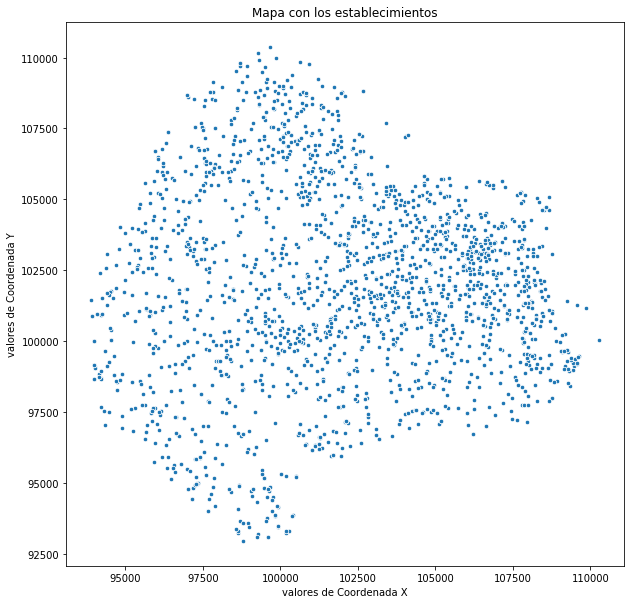

In [10]:
# Impresion la distribcion de los establecimientos
plt.figure(figsize=(10,10))
sns.scatterplot(x= esteduc_df.point_x.values , y= esteduc_df.point_y.values,s=20)
plt.title("Mapa con los establecimientos")
plt.xlabel("valores de Coordenada X")
plt.ylabel("valores de Coordenada Y")
plt.show()

## Eliminacion de Duplicados

In [11]:
esteduc_df.drop_duplicates( inplace= True, keep='first')
filas = np.shape(esteduc_df)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

# Verificamos como quedo el dataset
print(f'Nos quedamos con un dataframe de {esteduc_df.shape[0]} filas x {esteduc_df.shape[1]} columnas')


Filas: 2872
Nos quedamos con un dataframe de 2872 filas x 27 columnas


## NaNs.

### Exploracion de NaNs

In [12]:
col_NaN = esteduc_df.isnull().any()
print(col_NaN,'\r\n')

cui           False
cueanexo      False
cue           False
anexo         False
sector        False
dom_edific    False
dom_establ    False
nombre_est    False
nombre_abr     True
telefono      False
email          True
codpost       False
web_megcba     True
nivmod        False
nivelmodal    False
tipest_abr     True
tipest        False
depfun         True
depfun_otr    False
de            False
comuna        False
barrio        False
area_progr    False
estado        False
point_x       False
point_y       False
Nivel         False
dtype: bool 



In [13]:
# Cantidad de valores nulos ordenados descendentemente
total = esteduc_df.isnull().sum().sort_values(ascending=False)
# Porcentaje de lo que representa para cada columna
percent = (esteduc_df.isnull().sum()/esteduc_df.isnull().count()).sort_values(ascending=False)
# Mostramos los 2 resultados en conjunto.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
depfun,33,0.011490
tipest_abr,33,0.011490
web_megcba,18,0.006267
email,10,0.003482
nombre_abr,1,0.000348
Nivel,0,0.000000


### Eliminacion NaNs

In [14]:
# Limpiamos registros '.dropna'
esteduc_df.dropna(how ='any', inplace = True)
# Verificamos como quedo el dataset
print(f'Nos quedamos con un dataframe de {esteduc_df.shape[0]} filas x {esteduc_df.shape[1]} columnas')

Nos quedamos con un dataframe de 2821 filas x 27 columnas


## Cambio nombre en la columna sector

In [15]:
#Remplazamos el valor 1 por estatal y 2 por Privado
esteduc_df['sector'] = esteduc_df['sector'].map({1 : 'Estatal' ,2 : 'Privado'})
esteduc_df.head(100)

,cui,cueanexo,cue,anexo,sector,dom_edific,dom_establ,nombre_est,nombre_abr,telefono,...,depfun,depfun_otr,de,comuna,barrio,area_progr,estado,point_x,point_y,Nivel
0,200852,20153600,201536,0,Estatal,Carlos Berg 3460,Carlos Berg 3460,Esc. Primaria Común N° 09 Dr. Jose Benjamin Zu...,EPjs 09,4918-8855,...,Dirección de Educación Primaria,1,19.0,8.0,VILLA SOLDATI,05 - HOSP PENNA,1,103175.055789,96554.217126,Primario Común
1,200871,20227000,202270,0,Estatal,Agustín de Vedia 2519,Cnel. Martiniano Chilavert 1935,Escuela Infantil N° 06/19°,EI 06/19,4919-9258,...,Dirección de Educación Inicial,1,19.0,7.0,FLORES,06 - HOSP PIÑERO,1,102734.235790,97955.609336,Inicial Común
2,200014,20064600,200646,0,Estatal,Juncal 3131,Juncal 3131,Esc. Primaria Común N° 16 Wenceslao Posse,EPjs 16,4804-2411,...,Dirección de Educación Primaria,1,1.0,14.0,PALERMO,04 - HOSP FERNANDEZ,1,104947.440184,104887.143633,Primario Común
3,200871,20183300,201833,0,Estatal,Agustín de Vedia 2519,Agustín de Vedia 2519,Esc. de Educacion Media N° 03/19°,EEM 03/19,4919-0677/4918-4801,...,Dirección de Educación Media,1,19.0,7.0,FLORES,06 - HOSP PIÑERO,1,102734.235790,97955.609336,Secundario Común
4,200585,20041900,200419,0,Estatal,Caracas 10,Caracas 10,Esc. Primaria Común N° 02 Florencio Varela,EPjc 02,4611-7452,...,Dirección de Educación Primaria,1,12.0,7.0,FLORES,06 - HOSP PIÑERO,1,100115.816997,100156.345875,Primario Común
5,200863,20178300,201783,0,Estatal,Martínez Castro 3061,Martínez Castro 3067,Esc. de Educacion Media N° 02/19° Arturo Jaure...,EEM 02/19,4919-9094,...,Dirección de Educación Media,1,19.0,8.0,VILLA SOLDATI,06 - HOSP PIÑERO,1,101259.011301,96382.297602,Secundario Común
6,201980,20291500,202915,0,Privado,Quesada 2876,Quesada 2876,Escuela Infantil La Casita de Any,EI La Casita de Any,4544-1881,...,Dirección General de Educación de Gestión Privada,1,10.0,13.0,NUÑEZ,07 - HOSP PIROVANO,1,99535.921165,108084.193944,Inicial Común
7,200826,20172800,201728,0,Estatal,Arregui 4430,Arregui 4430,Escuela Infantil N° 05/18°,EI 05/18,4566-9998,...,Dirección de Educación Inicial,1,18.0,10.0,MONTE CASTRO,11 - HOSP VELEZ SARSFIELD,1,96280.965365,101564.197987,Inicial Común
8,201489,20143100,201431,0,Privado,Carbajal 3250,Carbajal 3250,Inst. Sta. Catalina de Belgrano,I Sta Catalina de Belgrano,4552-4353/8572,...,Dirección General de Educación de Gestión Privada,1,10.0,13.0,BELGRANO,07 - HOSP PIROVANO,1,100190.377836,106436.637537,Inicial Común - Primario Común - Secundario Co...
9,201536,20053400,200534,0,Privado,Virrey del Pino 3511,Virrey del Pino 3511,Inst. Mekhitarista,I Mekhitarista,4552-3690,...,Dirección General de Educación de Gestión Privada,1,10.0,13.0,BELGRANO,07 - HOSP PIROVANO,1,99789.085528,106332.062755,Inicial Común - Primario Común - Secundario Común


# Análisis exploratorio de datos

## Cantidad de registros/ establecimientos por nivel

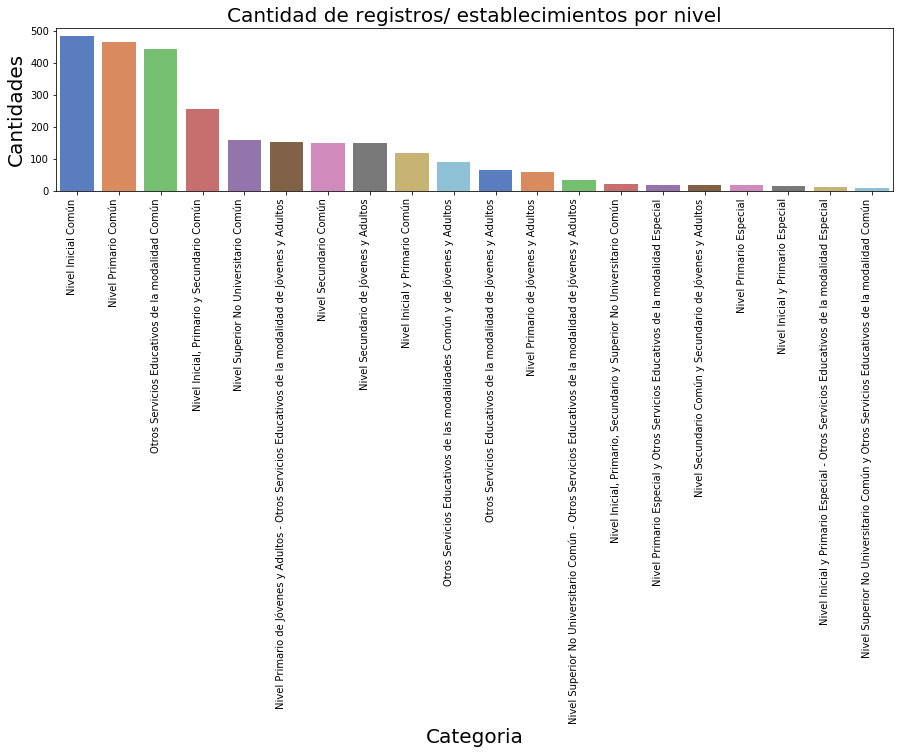

In [16]:
# top
top_n = 20
# Guardamos los indices de los top_n categorias
idx_top = esteduc_df['nivelmodal'].value_counts(ascending=False).index[0:top_n]
plt.figure(figsize=(15,3))
g = sns.countplot(x="nivelmodal", data=esteduc_df, order=idx_top, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de registros/ establecimientos por nivel', size = 20)
plt.xlabel("Categoria", size = 20)
plt.ylabel("Cantidades", size = 20)
plt.show()

## Cantidad de registros segun su sector

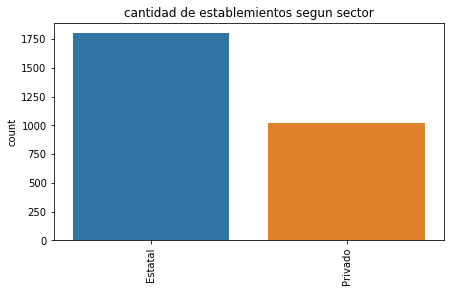

In [17]:
# sns.set_context("talk", font_scale=1)
plt.figure( figsize=(7,4) )
sns.countplot(esteduc_df.sector.values)
plt.title("cantidad de establemientos segun sector")
plt.xticks(rotation=90)
plt.show()


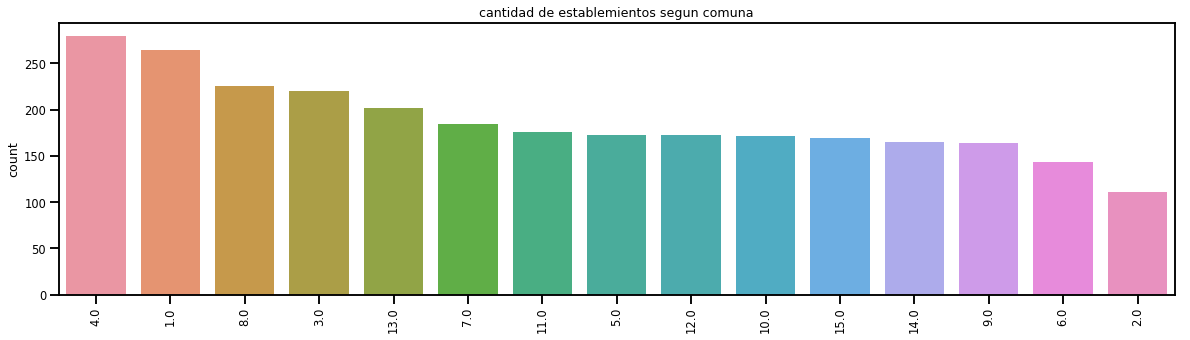

In [18]:
#Histograma por comuna
idx_top = esteduc_df['comuna'].value_counts(ascending=False).index[0:15]
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(20,5))
sns.countplot(esteduc_df.comuna.values,order=idx_top)
plt.title("cantidad de establemientos segun comuna")
plt.xticks(rotation=90)
plt.show()

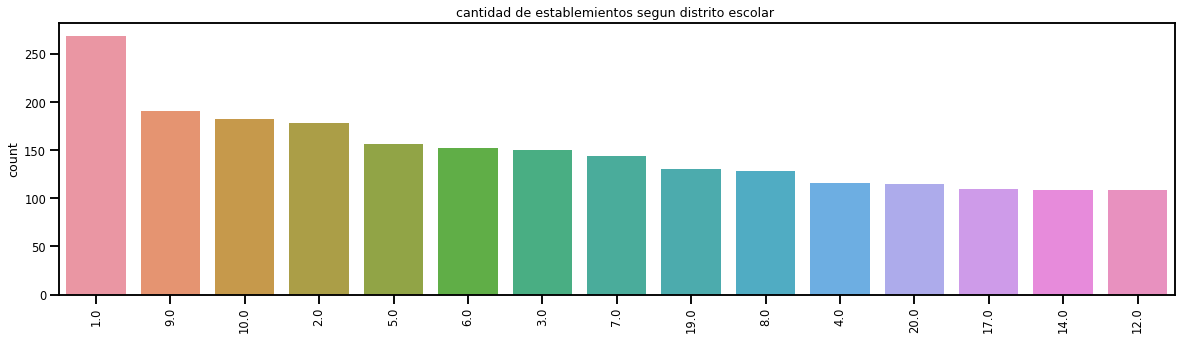

In [19]:
#Histograma por Distrito escolar 
idx_top = esteduc_df['de'].value_counts(ascending=False).index[0:15]
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(20,5))
sns.countplot(esteduc_df.de.values,order=idx_top)
plt.title("cantidad de establemientos segun distrito escolar ")
plt.xticks(rotation=90)
plt.show()

## Cantidad de establemientos segun barrio

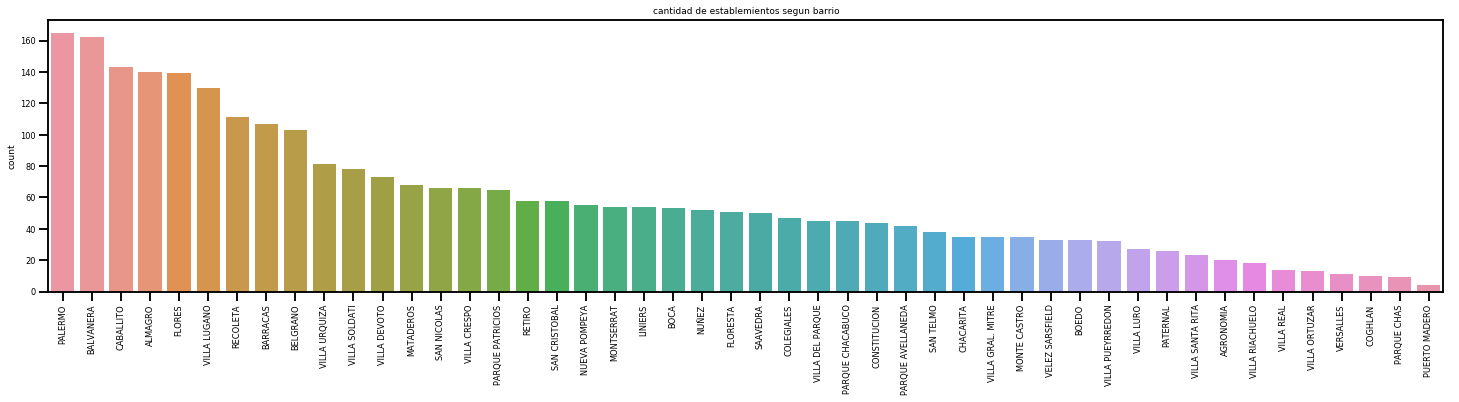

In [20]:
idx_top = esteduc_df['barrio'].value_counts(ascending=False).index[0:50]
sns.set_context("talk", font_scale=0.5)
plt.figure(figsize=(25,5))
sns.countplot(esteduc_df.barrio.values, order = idx_top)
plt.title("cantidad de establemientos segun barrio")
plt.xticks(rotation=90)
plt.show()

## Distribucion espacial de los establecimientos

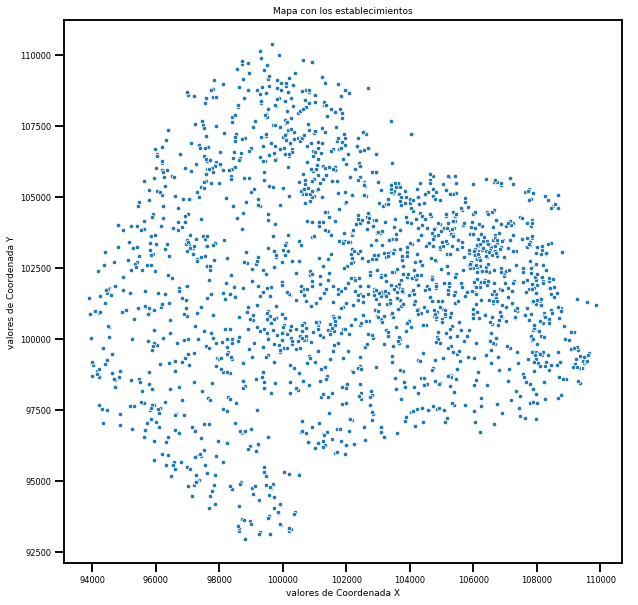

In [21]:
# Impresion la distribcion de los establecimientos
plt.figure(figsize=(10,10))
sns.scatterplot(x= esteduc_df.point_x.values , y= esteduc_df.point_y.values,s=20)
plt.title("Mapa con los establecimientos")
plt.xlabel("valores de Coordenada X")
plt.ylabel("valores de Coordenada Y")
plt.show()

## Distribucion espacial de los establecimientos Estatales y Privados

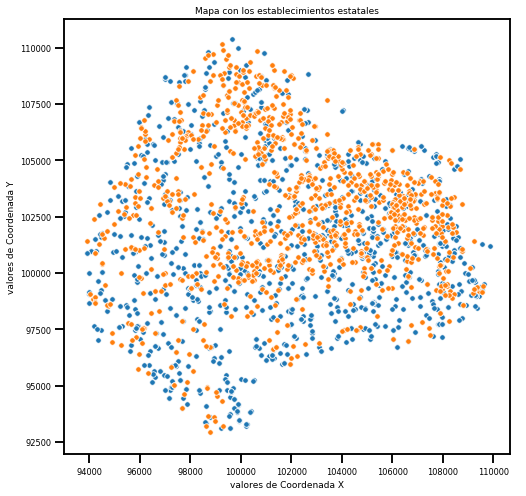

In [22]:
# Divido mi DataSet por Establecimientos Estatales y Privados
esteduc_estatal_df = esteduc_df[ esteduc_df['sector'] == 'Estatal' ]
esteduc_privado_df = esteduc_df[ esteduc_df['sector'] == 'Privado' ]
#Impresion del Grafico
plt.figure(figsize=(8,8))
sns.scatterplot( x= esteduc_estatal_df.point_x.values , y= esteduc_estatal_df.point_y.values,s=30 )
sns.scatterplot( x= esteduc_privado_df.point_x.values , y= esteduc_privado_df.point_y.values , s=30)
plt.title("Mapa con los establecimientos estatales")
plt.xlabel("valores de Coordenada X")
plt.ylabel("valores de Coordenada Y")
plt.show()

## Establecimientos educativos especiales

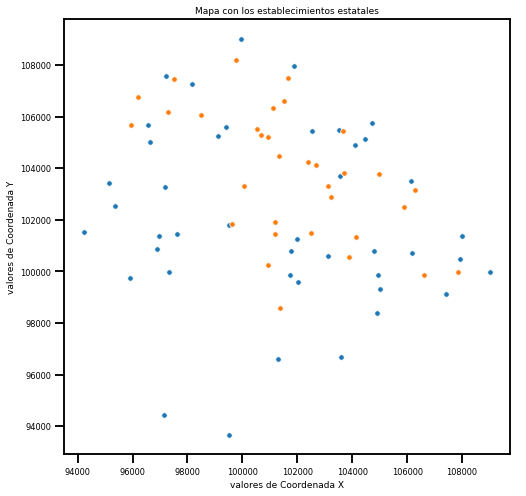

In [23]:
# separar los establecimiento educativos especiales
# df[df['ids'].str.contains("ball")]
inst_especial_df = esteduc_df[ esteduc_df.nivelmodal.str.contains('Especial') ]
# Impresion la distribcion de los establecimientos Especiales
esteduc_especial_estatal_df = inst_especial_df[ inst_especial_df['sector'] == 'Estatal' ]
esteduc_especial_privado_df = inst_especial_df[ inst_especial_df['sector'] == 'Privado' ]
#Impresion del Grafico
plt.figure(figsize=(8,8))
sns.scatterplot( x= esteduc_especial_estatal_df.point_x.values , y= esteduc_especial_estatal_df.point_y.values,s=30 )
sns.scatterplot( x= esteduc_especial_privado_df.point_x.values , y= esteduc_especial_privado_df.point_y.values , s=30)
plt.title("Mapa con los establecimientos estatales")
plt.xlabel("valores de Coordenada X")
plt.ylabel("valores de Coordenada Y")
plt.show()

## Distribucion geografica con cada uno de los niveles educativos

In [24]:
# separar los establecimiento educativos secundarios, primarios e inciales
esteduc_sec_df = esteduc_df[ esteduc_df.nivmod.str.contains('SecCom') ]
esteduc_pri_df = esteduc_df[ esteduc_df.nivmod.str.contains('PriCom') ]
esteduc_ini_df = esteduc_df[ esteduc_df.nivmod.str.contains('IniCom') ]

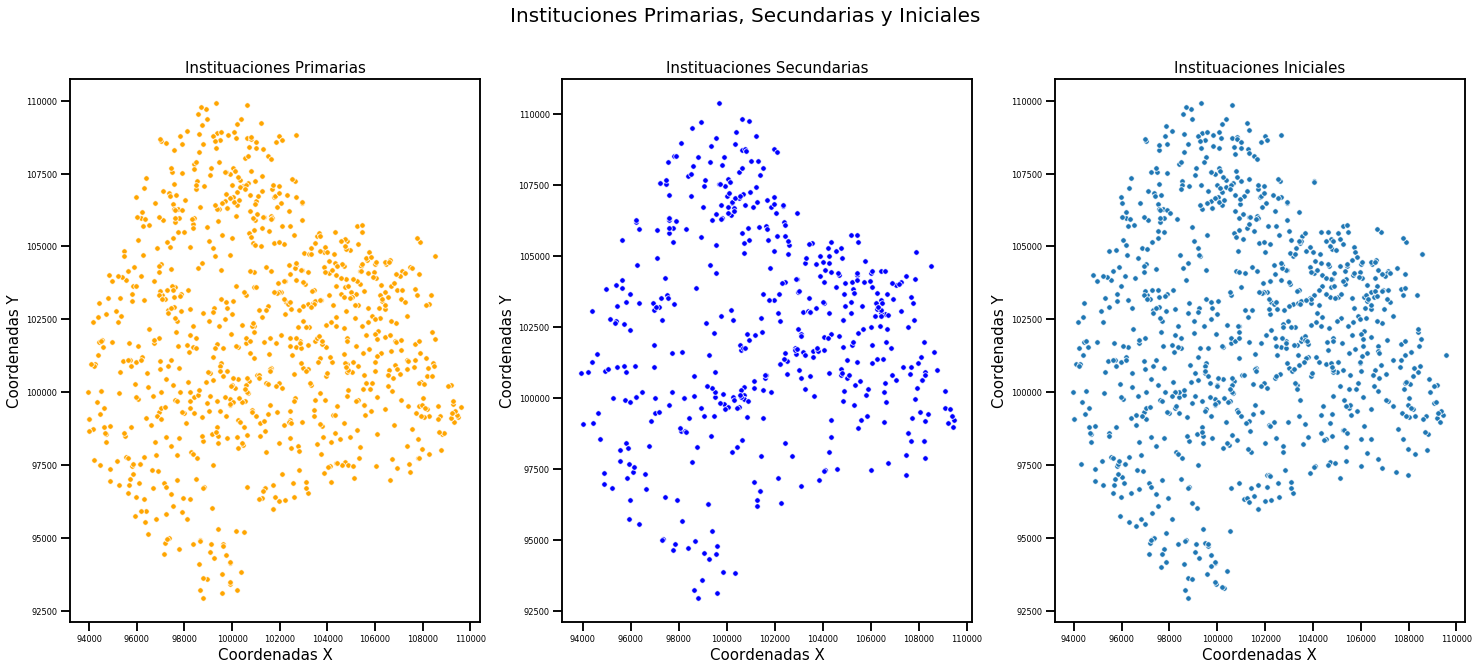

In [25]:
#Impresion del Grafico con cada uno de los niveles
fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(25,10))
fig.suptitle('Instituciones Primarias, Secundarias y Iniciales',size = 20)
sns.scatterplot( x= esteduc_pri_df.point_x.values , y= esteduc_pri_df.point_y.values,ax=ax1,s=30,color='Orange' )
ax1.set_xlabel("Coordenadas X",size = 15)
ax1.set_ylabel("Coordenadas Y",size = 15)
ax1.set_title('Instituaciones Primarias',size=15)
sns.scatterplot( x= esteduc_sec_df.point_x.values , y= esteduc_sec_df.point_y.values,ax=ax2,s=30,color='Blue')
ax2.set_xlabel("Coordenadas X",size = 15)
ax2.set_ylabel("Coordenadas Y",size = 15)
ax2.set_title('Instituaciones Secundarias',size=15)
sns.scatterplot( x= esteduc_ini_df .point_x.values , y= esteduc_ini_df .point_y.values,ax=ax3,s=30 )
ax3.set_xlabel("Coordenadas X",size = 15)
ax3.set_ylabel("Coordenadas Y",size = 15)
ax3.set_title('Instituaciones Iniciales',size=15)
plt.show()

## Distribcion de los establecimientos primarios

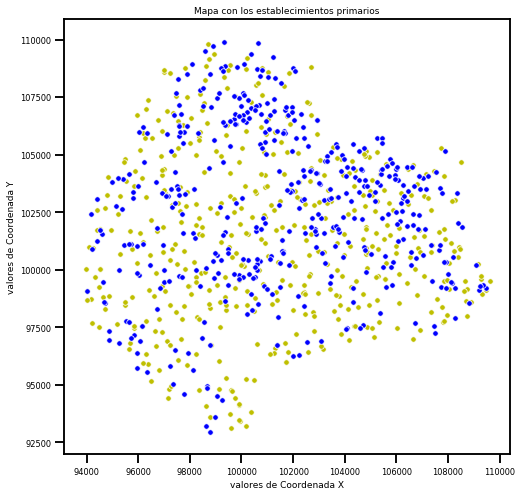

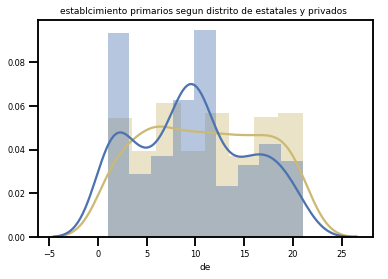

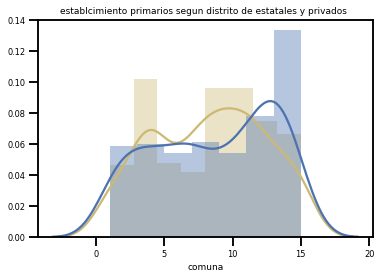

In [26]:
# Impresion la distribcion de los establecimientos primarios
esteduc_pri_estatal_df = esteduc_pri_df[ esteduc_pri_df['sector'] == 'Estatal' ]
esteduc_pri_privado_df = esteduc_pri_df[ esteduc_pri_df['sector'] == 'Privado' ]
#Impresion del Grafico
plt.figure(figsize=(8,8))
sns.scatterplot( x= esteduc_pri_estatal_df .point_x.values , y= esteduc_pri_estatal_df .point_y.values,s=30, color="y" )
sns.scatterplot( x= esteduc_pri_privado_df .point_x.values , y= esteduc_pri_privado_df .point_y.values,s=30, color="b" )
plt.title("Mapa con los establecimientos primarios")
plt.xlabel("valores de Coordenada X")
plt.ylabel("valores de Coordenada Y")
plt.show()
#histograma segun privado o estatal por de
sns.set_color_codes()
plt.title("establcimiento primarios segun distrito de estatales y privados ")
ax = sns.distplot(esteduc_pri_estatal_df.de, color="y")
ay = sns.distplot(esteduc_pri_privado_df.de, color="b")
plt.show()
#histograma segun privado o estatal por comuna
sns.set_color_codes()
plt.title("establcimiento primarios segun distrito de estatales y privados ")
ax = sns.distplot(esteduc_pri_estatal_df.comuna, color="y")
ay = sns.distplot(esteduc_pri_privado_df.comuna, color="b")
plt.show()

## Distribcion de los establecimientos secundarios

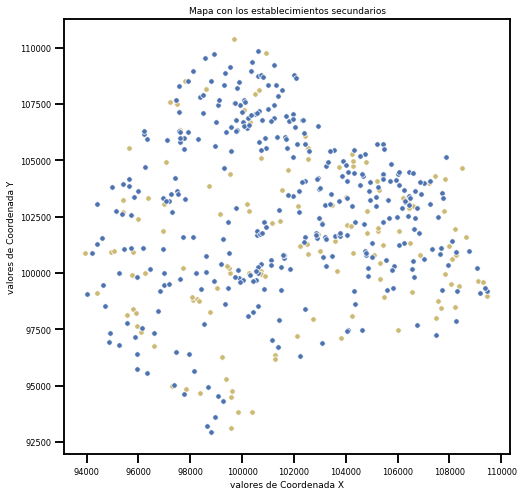

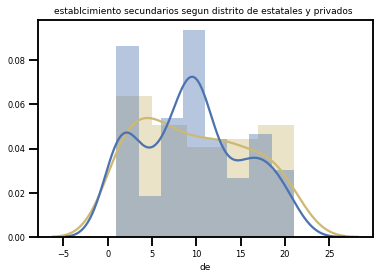

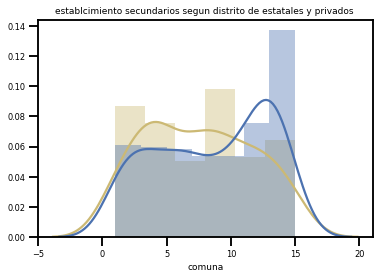

In [27]:
# Impresion la distribcion de los establecimientos secundarios
esteduc_sec_estatal_df = esteduc_sec_df[ esteduc_sec_df['sector'] == 'Estatal' ]
esteduc_sec_privado_df = esteduc_sec_df[ esteduc_sec_df['sector'] == 'Privado' ]
#Impresion del Grafico
plt.figure(figsize=(8,8))
sns.scatterplot( x= esteduc_sec_estatal_df .point_x.values , y= esteduc_sec_estatal_df .point_y.values,s=30, color="y" )
sns.scatterplot( x= esteduc_sec_privado_df .point_x.values , y= esteduc_sec_privado_df .point_y.values,s=30, color="b" )
plt.title("Mapa con los establecimientos secundarios")
plt.xlabel("valores de Coordenada X")
plt.ylabel("valores de Coordenada Y")
plt.show()
#histograma segun privado o estatal por de
sns.set_color_codes()
plt.title("establcimiento secundarios segun distrito de estatales y privados ")
ax = sns.distplot(esteduc_sec_estatal_df.de, color="y")
ay = sns.distplot(esteduc_sec_privado_df.de, color="b")
plt.show()
#histograma segun privado o estatal por comuna
sns.set_color_codes()
plt.title("establcimiento secundarios segun distrito de estatales y privados ")
ax = sns.distplot(esteduc_sec_estatal_df.comuna, color="y")
ay = sns.distplot(esteduc_sec_privado_df.comuna, color="b")
plt.show()

## Distribcion de los establecimientos iniciales

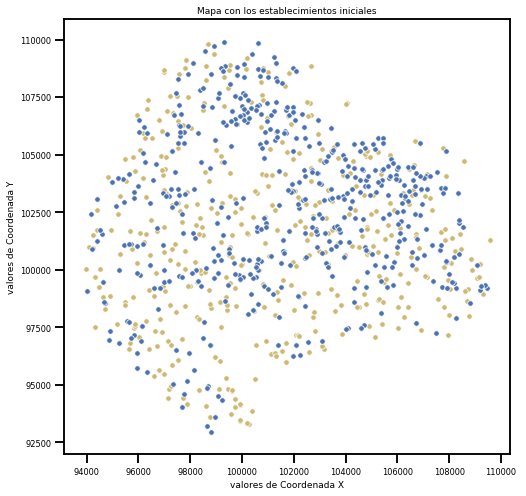

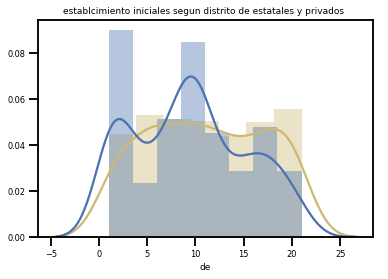

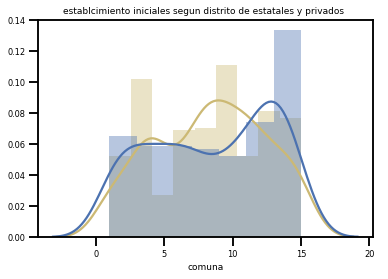

In [28]:
# Impresion la distribcion de los establecimientos iniciales
esteduc_ini_estatal_df = esteduc_ini_df[ esteduc_ini_df['sector'] == 'Estatal' ]
esteduc_ini_privado_df = esteduc_ini_df[ esteduc_ini_df['sector'] == 'Privado' ]
#Impresion del Grafico
plt.figure(figsize=(8,8))
sns.scatterplot( x= esteduc_ini_estatal_df .point_x.values , y= esteduc_ini_estatal_df .point_y.values,s=30, color="y" )
sns.scatterplot( x= esteduc_ini_privado_df .point_x.values , y= esteduc_ini_privado_df .point_y.values,s=30, color="b" )
plt.title("Mapa con los establecimientos iniciales")
plt.xlabel("valores de Coordenada X")
plt.ylabel("valores de Coordenada Y")
plt.show()
#histograma segun privado o estatal por de
sns.set_color_codes()
plt.title("establcimiento iniciales segun distrito de estatales y privados ")
ax = sns.distplot(esteduc_ini_estatal_df.de, color="y")
ay = sns.distplot(esteduc_ini_privado_df.de, color="b")
plt.show()
#histograma segun privado o estatal por comuna
sns.set_color_codes()
plt.title("establcimiento iniciales segun distrito de estatales y privados ")
ax = sns.distplot(esteduc_ini_estatal_df.comuna, color="y")
ay = sns.distplot(esteduc_ini_privado_df.comuna, color="b")
plt.show()

## Districion por DE y por comuna de todos los 3 niveles

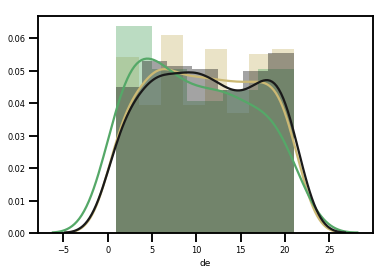

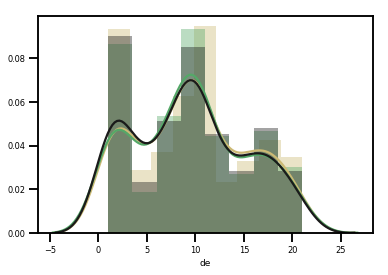

In [29]:
sns.set_color_codes()
ax = sns.distplot(esteduc_pri_estatal_df.de, color="y")
ay = sns.distplot(esteduc_sec_estatal_df.de, color="g")
az = sns.distplot(esteduc_ini_estatal_df.de, color="k")
plt.show()
sns.set_color_codes()
ax = sns.distplot(esteduc_pri_privado_df.de, color="y")
ay = sns.distplot(esteduc_sec_privado_df.de, color="g")
az = sns.distplot(esteduc_ini_privado_df.de, color="k")
plt.show()

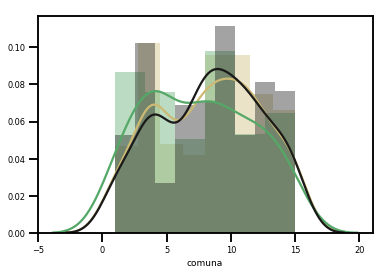

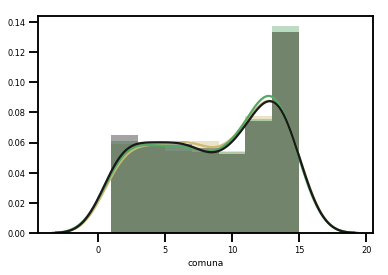

In [30]:
sns.set_color_codes()
ax = sns.distplot(esteduc_pri_estatal_df.comuna, color="y")
ay = sns.distplot(esteduc_sec_estatal_df.comuna, color="g")
az = sns.distplot(esteduc_ini_estatal_df.comuna, color="k")
plt.show()
sns.set_color_codes()
ax = sns.distplot(esteduc_pri_privado_df.comuna, color="y")
ay = sns.distplot(esteduc_sec_privado_df.comuna, color="g")
az = sns.distplot(esteduc_ini_privado_df.comuna, color="k")
plt.show()

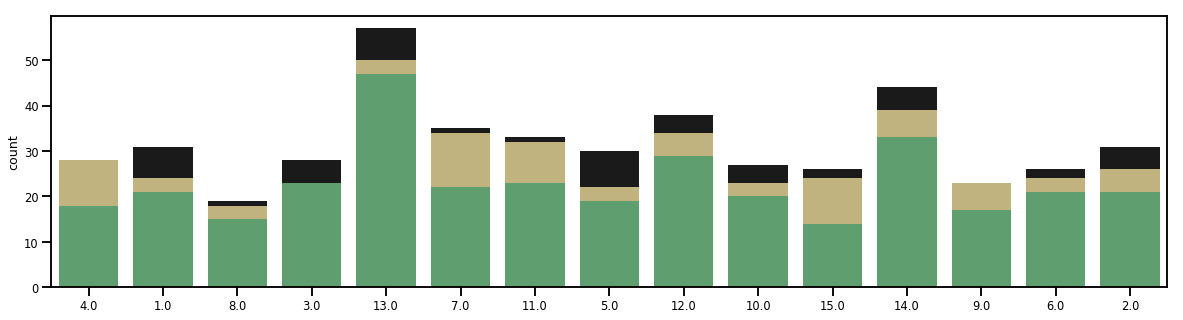

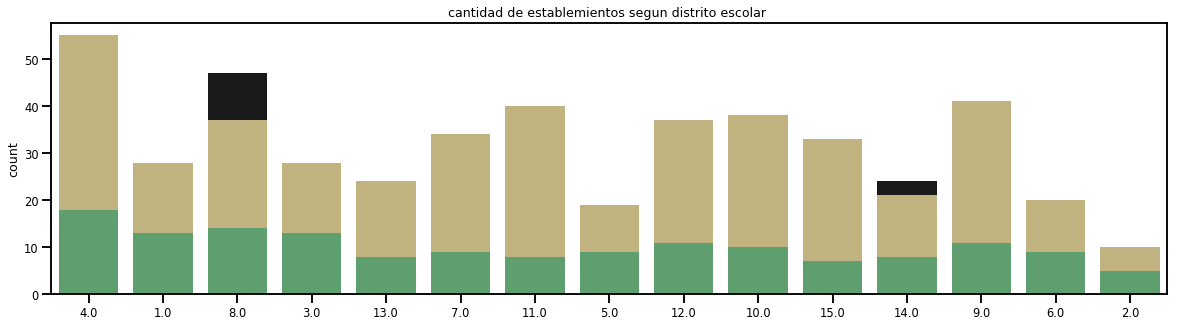

In [31]:
sns.set_color_codes()
idx_top = esteduc_df['comuna'].value_counts(ascending=False).index[0:50]
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(20,5))
sns.countplot(esteduc_ini_privado_df.comuna.values, color="k", order = idx_top)
sns.countplot(esteduc_pri_privado_df.comuna.values, color="y", order = idx_top)
sns.countplot(esteduc_sec_privado_df.comuna.values, color="g", order = idx_top)
plt.show()
sns.set_color_codes()
idx_top = esteduc_df['comuna'].value_counts(ascending=False).index[0:50]
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(20,5))
sns.countplot(esteduc_ini_estatal_df.comuna.values, color="k", order = idx_top)
sns.countplot(esteduc_pri_estatal_df.comuna.values, color="y", order = idx_top)
sns.countplot(esteduc_sec_estatal_df.comuna.values, color="g", order = idx_top)
plt.title("cantidad de establemientos segun distrito escolar ")
plt.show()


# Correlacion

In [32]:
#creo nuevo data frame con columnas (sector,nivelmodal, tipest, depfun, de, comuna, barrio, area_progr, estado, Nivel,'codpost')
reduccion_esteduc_df = esteduc_df.drop( [ 'cui','cueanexo','cue','anexo','dom_edific','dom_establ','nombre_est','nombre_abr','telefono','email','web_megcba','nivmod','tipest_abr',	'depfun_otr','point_x','point_y'],axis=1 )
reduccion_esteduc_df.head(2)

,sector,codpost,nivelmodal,tipest,depfun,de,comuna,barrio,area_progr,estado,Nivel
0,Estatal,C1437,Nivel Primario Común,Escuela de Jornada Simple,Dirección de Educación Primaria,19.0,8.0,VILLA SOLDATI,05 - HOSP PENNA,1,Primario Común
1,Estatal,C1437,Nivel Inicial Común,Escuela Infantil,Dirección de Educación Inicial,19.0,7.0,FLORES,06 - HOSP PIÑERO,1,Inicial Común


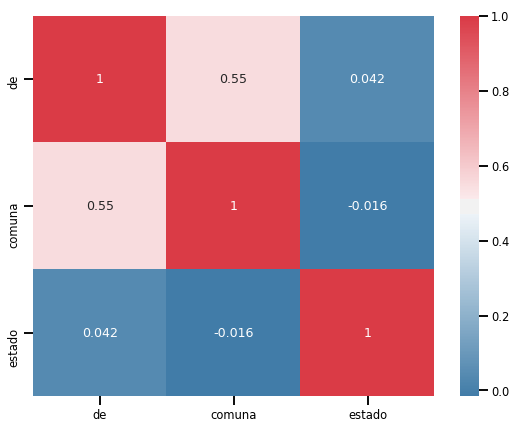

In [33]:
corrmat = reduccion_esteduc_df.corr()

f, ax = plt.subplots( figsize=(9, 7) )
ax = sns.heatmap(corrmat,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))